# Different Linear Models and There Working

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from copy import deepcopy
from sklearn.preprocessing import add_dummy_feature, PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, Lasso, ElasticNet, LogisticRegression
from sklearn.model_selection import learning_curve, train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_iris

## Linear Regression

In [2]:
np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1)    # random values in given shape
y = 4 + 3 * X + np.random.randn(m, 1)    # Return a sample (or samples) from the "standard normal" distribution.
# this is of form y = f(X) + Gaussian Noice, 
# where f(X) = 4 + 3X 
# => 4 * X0 + 3 * X1, where X0 (intercept/bias) = 1
# => f(X) = X.Theta, dot product of featuers and parameters

In [3]:
X[:5]

array([[0.74908024],
       [1.90142861],
       [1.46398788],
       [1.19731697],
       [0.31203728]])

In [4]:
y[:5]

array([[6.33428778],
       [9.40527849],
       [8.48372443],
       [5.60438199],
       [4.71643995]])

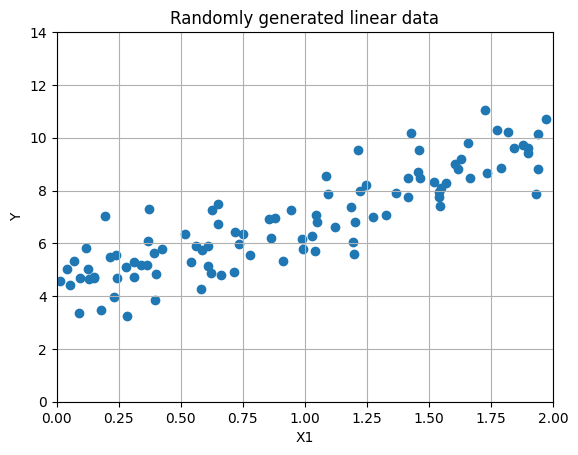

In [5]:
plt.scatter(X, y)
plt.xlabel('X1')
plt.ylabel('Y')
plt.title('Randomly generated linear data')
plt.axis([0, 2, 0, 14])
plt.grid()

In [6]:
X_b = add_dummy_feature(X)    # adding intercept X0 = 1

In [7]:
X_b[:5]

array([[1.        , 0.74908024],
       [1.        , 1.90142861],
       [1.        , 1.46398788],
       [1.        , 1.19731697],
       [1.        , 0.31203728]])

In [8]:
optimal_parameters = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y     # optimal parameters formula

In [9]:
optimal_parameters

array([[4.21509616],
       [2.77011339]])

In [10]:
optimal_params_svd, residulas, rank, s = np.linalg.lstsq(X_b, y, rcond= None)    # least squares

In [11]:
optimal_params_svd

array([[4.21509616],
       [2.77011339]])

In [12]:
np.linalg.pinv(X_b) @ y     # pseudo-inverse using SVD

array([[4.21509616],
       [2.77011339]])

### Making predictions

In [13]:
X_new = np.array([[0], [2]])

In [14]:
X_new_b = add_dummy_feature(X_new)

In [15]:
X_new_b

array([[1., 0.],
       [1., 2.]])

In [16]:
predictions = X_new_b @ optimal_parameters

In [17]:
predictions

array([[4.21509616],
       [9.75532293]])

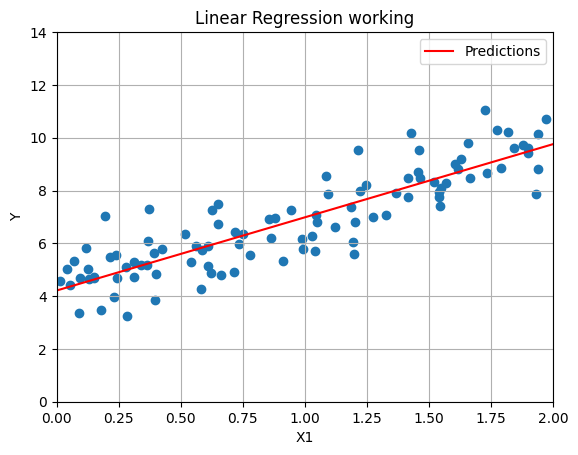

In [18]:
plt.scatter(X, y)
plt.plot(X_new, predictions, 'r-', label= 'Predictions')
plt.xlabel('X1')
plt.ylabel('Y')
plt.title('Linear Regression working')
plt.axis([0, 2, 0, 14])
plt.grid()
plt.legend()
plt.show()

### Using sklearn

In [19]:
lin_reg = LinearRegression()

In [20]:
lin_reg.fit(X, y)

LinearRegression()

In [21]:
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [22]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

## Gradient Descent

In [23]:
def optimal_params_gd(
    X: np.ndarray,
    *, 
    n_epochs: int= 1000, 
    learning_rate: float = 0.1
) -> np.ndarray:
    m = len(X)
    theta = np.random.randn(2, 1)
    
    for _ in range(n_epochs):
        gradients = 2 / m * (X.T @ (X @ theta - y))
        theta = theta - learning_rate * gradients
        
    return theta

In [24]:
optimal_params_gd(X_b)

array([[4.21509616],
       [2.77011339]])

In [25]:
optimal_params_gd(X_b, learning_rate= 0.5)    # high learning rate

array([[-4.56158569e+27],
       [-5.16632673e+27]])

In [26]:
optimal_params_gd(X_b, learning_rate= 0.001)     # low learning rate

array([[4.0065638 ],
       [2.84586499]])

## Stochastic Gradient Descent

In [27]:
def learning_schedule(t: int, t0: int = 5, t1: int = 50) -> float:
    return t0 / (t + t1)

np.random.seed(42)

theta = np.random.randn(2, 1)
n_epochs = 50
m = len(X_b)

for epoch in range(n_epochs):
    for iteration in range(m):
        random_index = np.random.randint(m)
        xi = X_b[[random_index]]
        yi = y[[random_index]]
        gradients = 2 * (xi.T @ (xi @ theta - yi))
        learning_rate = learning_schedule(epoch * m + iteration)
        theta = theta - learning_rate * gradients

In [28]:
theta

array([[4.21076011],
       [2.74856079]])

### Using sklearn

In [29]:
sgd_reg = SGDRegressor(penalty= None, tol= 1e-5, n_iter_no_change= 100, random_state= 42)

In [30]:
sgd_reg.fit(X, y.ravel())

SGDRegressor(n_iter_no_change=100, penalty=None, random_state=42, tol=1e-05)

In [31]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.21278812]), array([2.77270267]))

## Polynomial Regression

In [32]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)

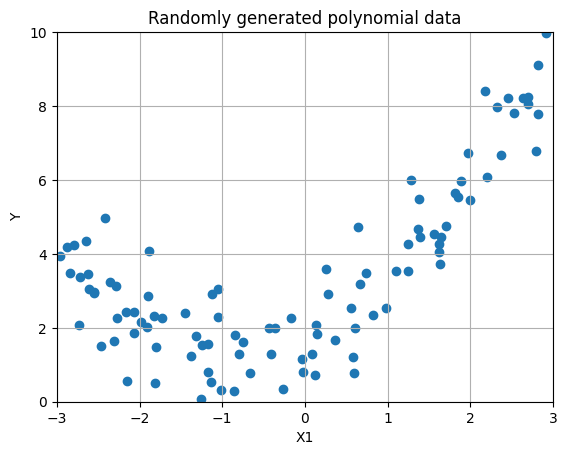

In [33]:
plt.scatter(X, y)
plt.xlabel('X1')
plt.ylabel('Y')
plt.title('Randomly generated polynomial data')
plt.axis([-3, 3, 0, 10])
plt.grid()
plt.show()

In [34]:
poly_features = PolynomialFeatures(degree= 2, include_bias= False)

In [35]:
X_poly = poly_features.fit_transform(X)

In [36]:
X_poly[:5]

array([[-0.75275929,  0.56664654],
       [ 2.70428584,  7.3131619 ],
       [ 1.39196365,  1.93756281],
       [ 0.59195091,  0.35040587],
       [-2.06388816,  4.25963433]])

In [37]:
lin_reg = LinearRegression()

In [38]:
lin_reg.fit(X_poly, y)

LinearRegression()

In [39]:
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

In [40]:
predicitons = lin_reg.predict(X_poly)

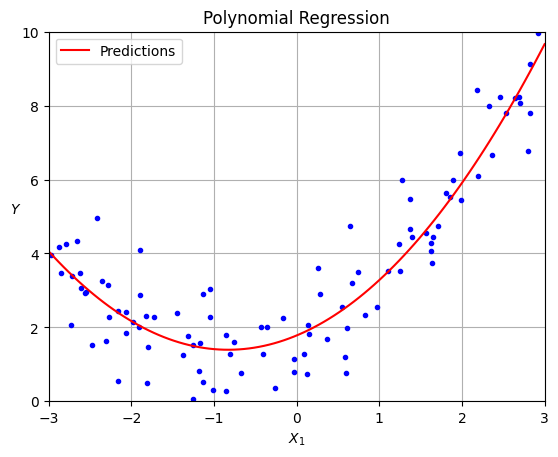

In [41]:
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

plt.plot(X, y, 'b.')
plt.plot(X_new, y_new, 'r-', label= 'Predictions')
plt.xlabel('$X_1$')
plt.ylabel('$Y$', rotation= 0)
plt.title('Polynomial Regression')
plt.axis([-3, 3, 0, 10])
plt.grid()
plt.legend()
plt.show()

## Learning Curves

In [42]:
train_size, train_scores, test_scores = learning_curve(
    LinearRegression(), X, y, 
    train_sizes= np.linspace(0.01, 1, 40), 
    scoring= 'neg_root_mean_squared_error'
)

In [43]:
train_size

array([ 1,  2,  4,  6,  8, 10, 12, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67,
       69, 71, 73, 75, 77, 80])

In [44]:
train_scores[:3]

array([[-0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        -0.00000000e+00, -0.00000000e+00],
       [-4.44089210e-16, -3.14018492e-16, -3.14018492e-16,
        -3.14018492e-16, -3.14018492e-16],
       [-6.74202452e-01, -1.35541971e+00, -1.35541971e+00,
        -1.35541971e+00, -1.35541971e+00]])

In [45]:
test_scores[:3]

array([[-2.36452507, -2.56711283, -3.314824  , -2.97448171, -2.78963255],
       [-2.12424827, -2.63795855, -2.73836243, -2.40638514, -2.52612012],
       [-2.24768665, -3.38468313, -3.52295015, -3.21137327, -3.17221406]])

In [46]:
train_errors = -train_scores.mean(axis= 1)
test_errors = -test_scores.mean(axis= 1)

In [47]:
train_errors[:5]

array([-0.00000000e+00,  3.40032635e-16,  1.21917626e+00,  1.55444643e+00,
        1.67538750e+00])

In [48]:
test_errors[:5]

array([2.80211523, 2.4866149 , 3.10778145, 1.83476451, 1.81585796])

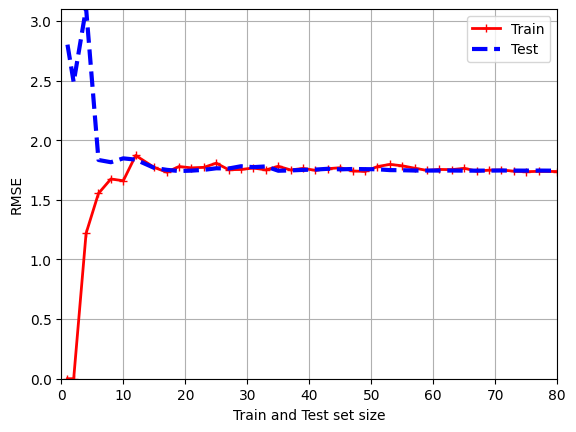

In [49]:
plt.plot(train_size, train_errors, 'r-+', label= 'Train', linewidth= 2)
plt.plot(train_size, test_errors, 'b--', label= 'Test', linewidth= 3)
plt.grid()
plt.legend()
plt.xlabel('Train and Test set size')
plt.ylabel('RMSE')
plt.axis([0, 80, 0, 3.1])
plt.show()

In [50]:
polynomial_regression = make_pipeline(
    PolynomialFeatures(degree= 10, include_bias= False), 
    LinearRegression()
)

In [51]:
train_size, train_scores, test_scores = learning_curve(
    polynomial_regression, X, y, 
    train_sizes= np.linspace(0.01, 1, 40), 
    scoring= 'neg_root_mean_squared_error'
)

In [52]:
train_errors = -train_scores.mean(axis= 1)
test_errors = -test_scores.mean(axis= 1)

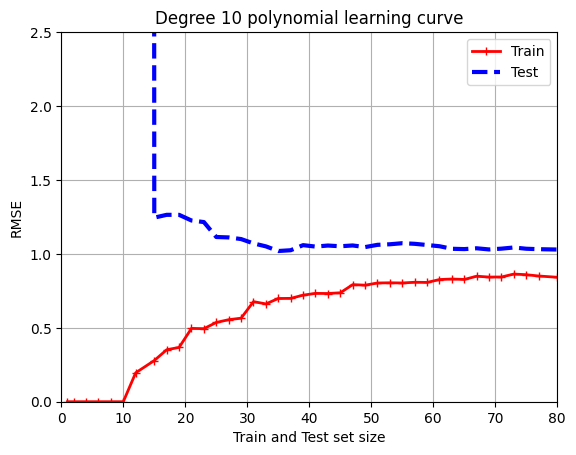

In [53]:
plt.plot(train_size, train_errors, 'r-+', label= 'Train', linewidth= 2)
plt.plot(train_size, test_errors, 'b--', label= 'Test', linewidth= 3)
plt.grid()
plt.legend()
plt.xlabel('Train and Test set size')
plt.ylabel('RMSE')
plt.title('Degree 10 polynomial learning curve')
plt.axis([0, 80, 0, 2.5])
plt.show()

## Ridge Regression

In [54]:
ridge_reg = Ridge(alpha= 0.1, solver= 'cholesky')

In [55]:
ridge_reg.fit(X, y)

Ridge(alpha=0.1, solver='cholesky')

In [56]:
ridge_reg.predict([[1.5]])

array([[4.82899748]])

In [57]:
sgd = SGDRegressor(alpha= 0.1 / m, tol= None, random_state= 42)

In [58]:
sgd.fit(X, y.ravel())

SGDRegressor(alpha=0.001, random_state=42, tol=None)

In [59]:
sgd.predict([[1.5]])

array([4.82830117])

## Lasso (_Least Absolute Shrinkage_ and _Selection Operator_) Regression

In [60]:
lasso = Lasso()

In [61]:
lasso.fit(X, y)

Lasso()

In [62]:
lasso.predict([[1.5]])

array([4.2971566])

In [63]:
sgd = SGDRegressor(penalty= 'l1', alpha= 0.1)

In [64]:
sgd.fit(X, y.ravel())

SGDRegressor(alpha=0.1, penalty='l1')

In [65]:
sgd.predict([[1.5]])

array([4.75312959])

## Elastic Net Regression

In [66]:
e_net = ElasticNet(alpha= 0.1)

In [67]:
e_net.fit(X, y)

ElasticNet(alpha=0.1)

In [68]:
e_net.predict([[1.5]])

array([4.78114505])

## Early Stopping

In [69]:
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state= 42)

In [70]:
preprocessing = make_pipeline(
    PolynomialFeatures(degree= 90, include_bias= False),
    StandardScaler()
)

In [71]:
X_train_prep = preprocessing.fit_transform(X_train)
X_val_prep = preprocessing.fit_transform(X_val)

In [72]:
sgd_reg = SGDRegressor(penalty= None, eta0= 0.002, random_state= 42)

In [73]:
n_epochs = 500
best_valid_rmse = float('inf')

In [74]:
for epoch in range(n_epochs):
    sgd_reg.partial_fit(X_train_prep, y_train.ravel())
    y_pred = sgd_reg.predict(X_val_prep)
    val_error = mean_squared_error(y_val, y_pred, squared= False)
    if val_error < best_valid_rmse:
        best_valid_rmse = val_error
        best_model = deepcopy(sgd_reg)

In [75]:
best_model

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

## Logistic Regression

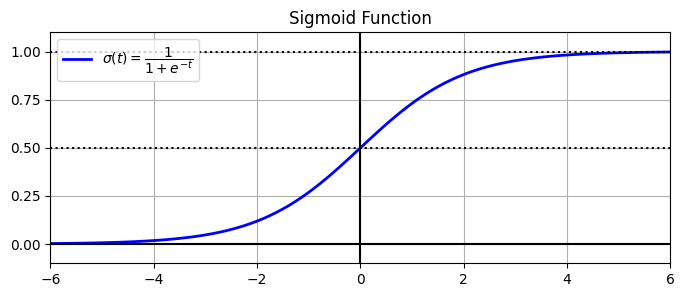

In [76]:
lim = 6
t = np.linspace(-lim, lim, 100)
sigmoid = 1 / (1 + np.exp(-t))

plt.figure(figsize= (8, 3))
plt.plot(t, sigmoid, 'b-', label= '$\sigma(t) = \dfrac{1}{1 + e^{-t}}$', linewidth= 2)
plt.plot([-lim, lim], [1, 1], 'k:')
plt.plot([-lim, lim], [0.5, 0.5], 'k:')
plt.plot([-lim, lim], [0, 0], 'k-')
plt.plot([0, 0], [-0.1, 1.1], 'k-')
plt.legend()
plt.grid()
plt.gca().set_yticks([0, 0.25, 0.5, 0.75, 1])
plt.axis([-lim, lim, -0.1, 1.1])
plt.title('Sigmoid Function')
plt.show()

In [77]:
iris = load_iris()

In [78]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [79]:
data, target = iris.data, iris.target

In [80]:
data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [81]:
target[:5]

array([0, 0, 0, 0, 0])

In [82]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [83]:
X = data[:, [3]]
X[:10]

array([[0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.4],
       [0.3],
       [0.2],
       [0.2],
       [0.1]])

In [84]:
y = (target == 2).astype('int64')

In [85]:
np.unique(y)

array([0, 1])

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 42)

In [87]:
log_reg = LogisticRegression(random_state= 42)

In [88]:
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=42)

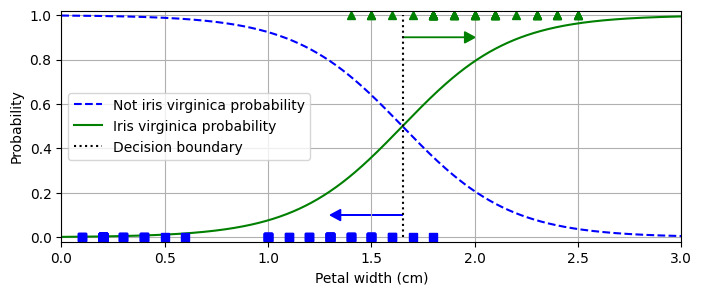

In [89]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0, 0]

plt.figure(figsize= (8, 3))
plt.plot(X_new, y_proba[:, 0], 'b--', label= 'Not iris virginica probability')
plt.plot(X_new, y_proba[:, 1], 'g-', label= 'Iris virginica probability')
plt.plot([decision_boundary, decision_boundary], [0, 1], 'k:', label= 'Decision boundary')
plt.arrow(decision_boundary, 0.9, 0.3, 0, color= 'g', head_length= 0.05, head_width= 0.05)
plt.arrow(decision_boundary, 0.1, -0.3, 0, color= 'b', head_length= 0.05, head_width= 0.05)
plt.plot(X_train[y_train == 0], y_train[y_train == 0], 'bs')
plt.plot(X_train[y_train == 1], y_train[y_train == 1], 'g^')
plt.xlabel('Petal width (cm)')
plt.ylabel('Probability')
plt.grid()
plt.legend()
plt.axis([0, 3, -0.02, 1.02])
plt.show()

In [90]:
decision_boundary

1.6516516516516517

In [91]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

## Softmax Regression

In [92]:
X = data[:, [2, 3]]
y = target

In [93]:
softmax_reg = LogisticRegression(C= 30, random_state= 42)

In [94]:
softmax_reg.fit(X, y)

LogisticRegression(C=30, random_state=42)

In [95]:
softmax_reg.predict([[5, 2]])

array([2])

In [96]:
softmax_reg.predict_proba([[5, 2]]).round(2)

array([[0.  , 0.03, 0.97]])